In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

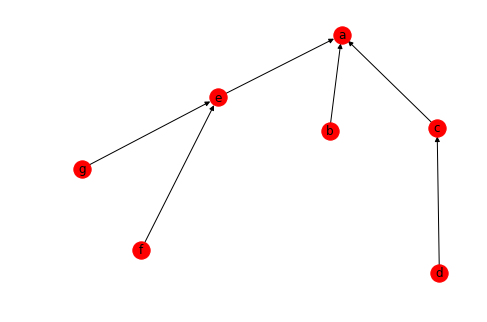

A query on target a in  involves 6 nodes:  ['f', 'd', 'b', 'g', 'c', 'e']
target  a  has either more than 1 parent or no parents,  ['b', 'c', 'e']
target  a  has either more than 1 parent or no parents,  ['b', 'c', 'e']
target  b  has either more than 1 parent or no parents,  []
target  c has one parent  d
d  has no parents, edge ( d , c ) is reversible
target  e  has either more than 1 parent or no parents,  ['f', 'g']
target  b  has either more than 1 parent or no parents,  []
target  c  has either more than 1 parent or no parents,  []
target  e  has either more than 1 parent or no parents,  ['f', 'g']
target  f  has either more than 1 parent or no parents,  []
target  g  has either more than 1 parent or no parents,  []
target  f  has either more than 1 parent or no parents,  []
A query on target a in  involves 5 nodes:  ['f', 'b', 'g', 'c', 'e']
Upstream nodes reduced by 1


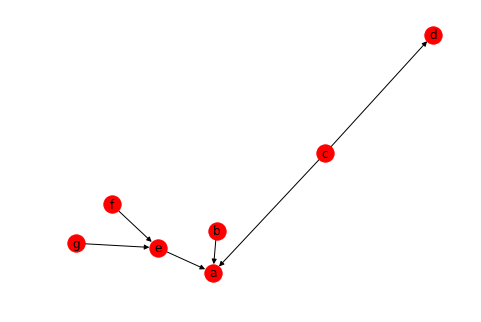

In [25]:
## PROBLEM: Some nodes are getting switched and unswitched. 
## QUESTION: Can I prove that these edges are inconsequential to total cost of query,
##           or alternately, there is a preferred switch (first?)

G = nx.DiGraph()
G.add_edges_from([("b","a"),("c","a"),("d","c"),("e","a"),("f","e"),("g","e")])

def query_cost(G, X): #G a DAG, target a node at the base of our query (ie x in p(x|y,z))
    nodes = list(nx.ancestors(G,X))
    print("A query on target", X, "in", G, "involves", len(nodes), "nodes: ", nodes)
    return(len(nodes))
    
def graph_reduce(G, target): #G a DAG, target a node at the base of our query (ie x in p(x|y,z)) 
    X = target
    cost1 = query_cost(G, X)
    queue = []
    visited = []
    queue.append(X)
    visited.append(X)
    
    while (len(queue) != 0):
        parents = list(G.predecessors(X))
        
        if(len(parents) == 1):  
            parent = parents[0]   
            print("target ", X, "has one parent ", parent)
            grandparents = list(G.predecessors(parent))
            if (len(grandparents) == 0): 
                print(parent, " has no parents, edge (", parent, ",", X, ") is reversible")
                if G.has_edge(parent, X):
                    G.remove_edge(parent, X)
                    G.add_edge(X, parent)
                visited.append(queue[0])
                X = queue[0]
                queue.pop(0)
                
            else:
                for parent_i in list(parents):
                    queue.append(parent_i)
                visited.append(queue[0])
                X = queue[0]
                queue.pop(0)
                            
        else: 
            print("target ", X, " has either more than 1 parent or no parents, ", parents)
            for parent_i in list(parents):
                queue.append(parent_i)
            visited.append(queue[0])
            X = queue[0]
            queue.pop(0)
            
    cost2 = query_cost(G,target)
    print("Upstream nodes reduced by",(cost1-cost2))
    return(G)

nx.draw(G, with_labels=True)
plt.show()  
     
# nx.is_isomorphic(skeleton(G), skeleton(Gc), node_match=None, edge_match=None)

Gred = graph_reduce(G, "a")
nx.draw(Gred, with_labels=True)
plt.show()  



Acyclic: True


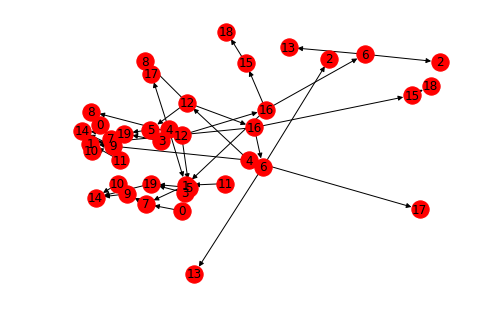

A query on target 5 in  involves 2 nodes:  [4, 12]
target  5 has one parent  12
target  5 has one parent  12
target  12 has one parent  4
4  has no parents, edge ( 4 , 12 ) is reversible
A query on target 5 in  involves 1 nodes:  [12]
Upstream nodes reduced by 1


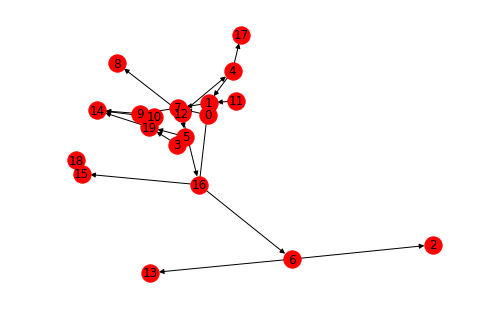

In [80]:
# G = nx.gnm_random_graph(20, 20, seed=0, directed=True)
# G = nx.gnc_graph(20, create_using=None, seed=None)
G = nx.erdos_renyi_graph(20, .05, seed=3, directed=True)
acyclic = (nx.is_directed_acyclic_graph(G))
print("Acyclic:", (nx.is_directed_acyclic_graph(G)))

nx.draw(G, with_labels=True)

if acyclic:
    nx.set_edge_attributes(G, "none", 'order')
    nx.set_node_attributes(G, "none", 'order')

    nx.draw(G, with_labels=True)
    plt.show()  

    Gred = graph_reduce(G, 5) 
    nx.draw(Gred, with_labels=True)
    plt.show()  

In [36]:
def order_edges(G):
    G_sort = nx.topological_sort(G)
    for j,node in enumerate(G_sort):
        G.nodes[node]['order'] = j #assign order of nodes as node label
    i=0
    while( [G[edge[0]][edge[1]]['order'] == "none" for edge in G.edges()] ): #if there exists an unordered edge
        node_iterate = 0
        node = [x for x,y in G.nodes(data=True) if y['order']==node_iterate]
        print(node)
        print("yes")

        
    
    return()
    
print(order_edges(G))


NetworkXUnfeasible: Graph contains a cycle or graph changed during iteration

Deriving a formula or algorithm for computing the parameters of two binary variables after reversing the edge between them.


In [ ]:
## Construct the essential graph for the Markov equivalence class of a given DAG-model using the Verma, Pearl procedure:
    # Identify v-structures
    # Remove orientation from any link not incolved in a V-structure

In [ ]:
## Look for algorithm to find the set of reversible edge for a given DAG-Model.
    # That is, find edges such that the MEC of the graph is unchanged by reversing the edge (immediate reversal)
    # Do so by identifying V-structures and returning set of edges not involved in them. 


In [ ]:
## Construct an algorithm for:
## Given a DAG-Model and a set of variables from the model, find the
## subset of variables that always have to be considered when sampling the
## specified set.

## That is, given a DAG, identify reversible edges, 
    # 

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
1 {1: 0, 0: 1, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5, 8: 6, 9: 7} 
3 {3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6} 
4 {4: 0, 5: 1, 3: 1, 6: 2, 0: 2, 1: 2, 2: 2, 7: 3, 8: 4, 9: 5} 
5 {5: 0, 4: 1, 6: 1, 3: 2, 7: 2, 0: 3, 1: 3, 2: 3, 8: 3, 9: 4} 
6 {6: 0, 5: 1, 7: 1, 4: 2, 8: 2, 3: 3, 9: 3, 0: 4, 1: 4, 2: 4} 
7 {7: 0, 6: 1, 8: 1, 5: 2, 9: 2, 4: 3, 3: 4, 0: 5, 1: 5, 2: 5} 
8 {8: 0, 7: 1, 9: 1, 6: 2, 5: 3, 4: 4, 3: 5, 0: 6, 1: 6, 2: 6} 
9 {9: 0, 8: 1, 7: 2, 6: 3, 5: 4, 4: 5, 3: 6, 0: 7, 1: 7, 2: 7} 

average shortest path length 2.86

length #paths
0 10
1 24
2 16
3 14
4 12
5 10
6 8
7 6
radius: 4
diameter: 7
eccentricity: {0: 7, 1: 7, 2: 7, 3: 6, 4: 5, 5: 4, 6: 4, 7: 5, 8: 6, 9: 7}
center: [5, 6]
periphery: [0, 1, 2, 9]
density: 0.26666666666666666


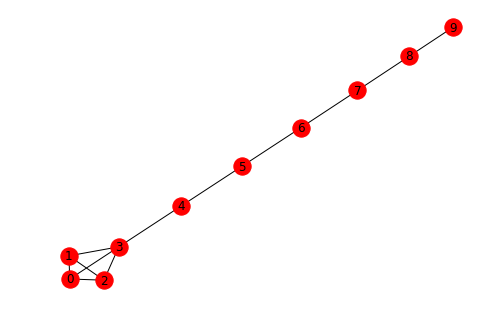

In [5]:

G = nx.lollipop_graph(4, 6)

pathlengths = []

print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print('{} {} '.format(v, spl))
    for p in spl:
        pathlengths.append(spl[p])

print('')
print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print('')
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d, dist[d]))

print("radius: %d" % nx.radius(G))
print("diameter: %d" % nx.diameter(G))
print("eccentricity: %s" % nx.eccentricity(G))
print("center: %s" % nx.center(G))
print("periphery: %s" % nx.periphery(G))
print("density: %s" % nx.density(G))

nx.draw(G, with_labels=True)
plt.show()